In [4]:
#pip install control
#baixa para o google colab e nao para a maquina

     |████████████████████████████████| 339 kB 5.2 MB/s 
  Created wheel for control: filename=control-0.9.0-py2.py3-none-any.whl size=344928 sha256=f1ecab7d8beb7334f1e2496a256dbb0f4a299c690ff29c03ecc1352f03deedb9
  Stored in directory: /root/.cache/pip/wheels/5b/64/54/70faad181d7baff1184541ca00c9a2efa633acd0a811831d30
Successfully built control


In [15]:
#bibliotexas para o projeto
import control as ctl
import matplotlib.pyplot as plt
import numpy as np

In [17]:
#variaveis de resistencia e capacitancia
R = 20.0e3; C = 10.0e-6; tau = R*C

#vetores que serao os polinomios para a funçao de transferencia
Tsim = 1. #vetor de tempo de simulaçao
numerador = [1/tau]; denominador = [1., 1/tau] #"1/tau", "1/tau + s"

print("{}, {}, {}".format(Tsim, numerador, denominador))

1.0, [5.0], [1.0, 5.0]


In [31]:
#Funçoes de transferencia

#usa os vetores para criar a funçao de transferencia em MA e imprimi ela
P_s = ctl.tf(numerador, denominador)
print('FT malha aberta:', P_s)

#funçao de transferencia do controlador
C_s = ctl.tf([3.], [1.]) #mesmo o controlador tendo uma funçao constante/proporcional, nao conseguimos criar uma tf apenas com numerador, devemos colocar denominador mesmo que seja 1
print('FT controlador:', C_s)

#funçao transferencia sensor
H_s = ctl.tf([1.], [1.])
print('FT sensor:', H_s)

#funçao de transferencia da malha fechada MF
#G1_s = (C_s*P_s)/(1+P_s*C_s*H_s)
G_s = ctl.series(C_s, P_s)
G1_s = ctl.feedback(G_s, H_s, sign=-1)
print('FT malha fechada', G1_s)

FT malha aberta: 
  5
-----
s + 5

FT controlador: 
3
-
1

FT sensor: 
1
-
1

FT malha fechada 
  15
------
s + 20



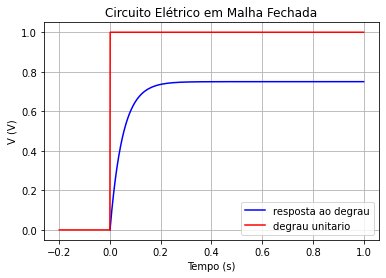

In [32]:
#calcula a resposta ao degrau
T_mf, yout_mf = ctl.step_response(G1_s, Tsim) # retorna dois valores a partir dos parametros de funçao de transferencia e tempo
plt.plot(T_mf, yout_mf, 'b-')

#calcula um degrau unitario
T2 = np.linspace(-0.2, Tsim, 1000) #cria um vetor de -0.2 ate Tsim com 1000 pontos entre eles
degrau = np.ones_like(T2)
degrau[T2<0] = 0
plt.plot(T2, degrau, 'r-')

#melhorando o grafico
plt.title("Circuito Elétrico em Malha Fechada")
plt.ylabel('V (V)'); plt.xlabel('Tempo (s)')
plt.legend(['resposta ao degrau', 'degrau unitario'])
plt.grid()